## 4/16 範例程式

### 讀取資料

In [2]:
import pandas as pd 
df = pd.read_csv("data/10802_2020_party.csv") #匯資料
df["Post_Date"] = df["Date"].str.split(" ").str.get(0).str.title() #加Post_Date欄位
df['Post_Date'] = pd.to_datetime(df['Post_Date'])

df_blue_New = df[df['Page_Name']=='中國國民黨 KMT'][['Message','Post_Date']] #只要國民黨的文章和時間
df_blue_New = df_blue_New.dropna()

### 結巴斷詞 jieba
+ len(df_blue_New)：看國民黨的貼文總共有幾筆，單獨把doc_names印出來發現有482篇
+ 原本df_blue_New['Message']型態是pandas.core.series.Series，需要先轉成list的形式才可以加進去。
+ 接下來我們創造一個新的dataframe叫做df_blue_docs，型態是pandas.core.frame.DataFrame
+ 原本df_blue_docs裡面的'jieba_results'欄位型態是pandas.core.series.Series，需要轉成'str'(字串)型態才能做後續處理。

In [3]:
doc_names = range(len(df_blue_New)) #有幾篇文章
text_list = list(df_blue_New['Message']) #把要斷的東西轉list

#創造空的dataframe叫做df_blue_docs
df_blue_docs = pd.DataFrame(columns=['jieba_results'])

df_blue_docs['jieba_results'] = df_blue_docs['jieba_results'].astype('str')

把要存斷詞結果的dataframe準備好之後，就可以開始斷詞了。</br>

+ 第一個迴圈</br>
剛才我們知道，國民黨的篇數有482篇：
我們可以用一個for迴圈來跑每一篇文章，i是對應文章的意思，會從1(第一篇)跑到482(第482篇)；</br>
而text_list就是我們剛剛轉成list型態的國民黨貼文內容；text_list[1]，就是取出list第一個元素(第一篇貼文)的意思。</br>

+ 第二個迴圈</br>
words存的是文章斷詞後的集合物件(object)，我們需要跑第二個for迴圈把集合裡面的字取出來，</br>
word代表斷詞集合中的一個字，先把字轉換成str(字串)型態之後，字和字之間加上空格存在一起。

+ append加回斷詞欄位</br>
之後把text內容存到'jieba_results'這個欄位裡面，再和df_blue_docs合併。</br>
最後我們df_blue_docs，只會一個欄位jieba_results，存斷詞之後的結果。

In [4]:
import jieba
from tqdm import tqdm

for i in doc_names: #從第一篇到最後一篇
    words = jieba.cut(text_list[i], cut_all = False)
    
    text = ''
    for word in words:
        text = text + ' ' + str(word)    
    #print(words)
    #print(i) #第幾篇文章
    #print(text) #第幾篇文章的斷詞結果
    
    s = pd.Series({'jieba_results': text})
    df_blue_docs = df_blue_docs.append(s, ignore_index=True)#每次的斷詞結果都加回df_blue_docs

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\User\AppData\Local\Temp\jieba.cache
Loading model cost 0.656 seconds.
Prefix dict has been built succesfully.


+ 注意
在最後生成的df_blue_docs，因為是ignore_index=True有重置過index</br>
所以在和df_blue_New合併之前，需要先重置df_blue_New的index</br>
> 可以參考：https://ithelp.ithome.com.tw/m/articles/10200052

In [5]:
df_blue_New.reset_index(inplace=True)

我們把最後得到的df_blue_docs，加到df_blue_New裡面

In [6]:
df_blue_New['jieba_results'] = df_blue_docs
df_blue_New_select = df_blue_New[['jieba_results','Post_Date']]
df_blue_New.head(2)

#可以查看個別貼文的斷詞情況
#df_blue_New['jieba_results'][477]

,index,Message,Post_Date,jieba_results
0,31,今日挺韓「南方崛起高雄光榮周年慶大遊行」 下午1點11分準時出發\n全程我們都是秉持著理性且...,2019-12-21,今日 挺韓 「 南方 崛起 高雄 光榮 周年 慶大遊行 」 下午 1 點 11 分準 ...
1,100,【元旦升旗，不見不散】\n\n你有多久沒有唱國歌、升國旗了？迎接明年元旦，我們一起升旗吧！國...,2019-12-29,【 元旦 升旗 ， 不見 不散 】 \n \n 你 有 多久 沒有 唱國歌 、 升國旗 了...


### 分析 民主進步黨 與 台灣民眾黨  

> #### 1. 資料前處理 
> #### 2. TF-IDF
> #### 3. PCA    
> #### 4. 關聯圖

### 資料前處理
選出民進黨的發文，處理方式和上面一樣

In [7]:
df_green = df[df['Page_Name']=='民主進步黨']
df_green_New = df_green[['Post_Date', 'Message']]
df_green_New = df_green_New.dropna()
df_green_New['Message']

doc_names = range(len(df_green_New))
text_list = list(df_green_New['Message'])
df_green_docs = pd.DataFrame(columns=['jieba_results'])
df_green_docs['jieba_results'] = df_green_docs['jieba_results'].astype('str')

for i in doc_names:
    words = jieba.cut(text_list[i], cut_all = False)
    text = ''
    for word in words:
        text = text + ' ' + str(word)
    s = pd.Series({'jieba_results': text})
    df_green_docs = df_green_docs.append(s, ignore_index=True)  
    
df_green_New.reset_index(inplace=True)  #不設定的話會有錯亂的情形，data對不起來
df_green_New['jieba_results'] = df_green_docs
df_green_New['df_class'] = 'green'
df_green_New.head()

,index,Post_Date,Message,jieba_results,df_class
0,3,2020-01-11,《2020 台灣要贏 LET'S WIN 開票之夜》,《 2020 台灣 要贏 LET ' S WIN 開票 之夜 》,green
1,10,2020-01-10,總統票3號蔡英文、賴清德，立委票請支持民主進步黨提名或推薦的候選人，第三張政黨票最重要，請集...,總統票 3 號蔡 英文 、 賴清德 ， 立委 票 請 支持 民主 進步 黨 提名 或 推薦...,green
2,11,2020-01-07,#這是我的投票意志\n\n總統票3號、政黨票14號，\n3.14是圓周率，守護民主需要投票率...,# 這是 我 的 投票 意志 \n \n 總統票 3 號 、 政黨票 14 號 ， \n ...,green
3,14,2020-01-10,🔥蔡英文賴清德 #光復高雄 選前之夜🔥\n\n2020 高雄大贏！2020 台灣要贏！\n高...,🔥 蔡 英文 賴清德 # 光 復 高雄 選前 之夜 🔥 \n \n 2020 ...,green
4,19,2020-01-05,1月11日，我們一起回家投票！\n\n這一天的你，早起搭上返鄉的列車，檢查身份證是否帶上，我...,1 月 11 日 ， 我們 一起 回家 投票 ！ \n \n 這 一天 的 你 ， 早起 ...,green


選出台灣民眾黨的發文，處理方式和上面一樣

In [8]:
df_white = df[df['Page_Name']=='台灣基進']

df_white_New = df_white[['Post_Date', 'Message']]
df_white_New = df_white_New.dropna()
df_white_New['Message']

doc_names = range(len(df_white_New))
text_list = list(df_white_New['Message'])
df_white_docs = pd.DataFrame(columns=['jieba_results'])
df_white_docs['jieba_results'] = df_white_docs['jieba_results'].astype('str')

for i in doc_names:
    words = jieba.cut(text_list[i], cut_all = False)
    text = ''
    for word in words:
        text = text + ' ' + str(word)
    s = pd.Series({'jieba_results': text})
    if(text=='NAN'):
        print(text_list[i])
    elif(text==''):
        print(text_list[i])
    df_white_docs = df_white_docs.append(s, ignore_index=True)  
    
df_white_New.reset_index(inplace=True)        
df_white_New['jieba_results'] = df_white_docs
df_white_New['df_class'] = 'white'
df_white_New.head()

,index,Post_Date,Message,jieba_results,df_class
0,0,2020-01-11,選舉過後，台灣基進不會停歇。\n \n縱使韓國瑜沒有當選，他仍然在高雄破壞著我們的城市，仍會...,選舉過 後 ， 台灣 基進 不會 停歇 。 \n \n 縱使 韓國瑜 沒有 當選 ， ...,white
1,1,2020-01-10,謝謝吳念真支持陳柏惟❤️！,謝謝 吳念 真 支持 陳 柏惟 ❤ ️ ！,white
2,2,2020-01-12,【 3Q 陳柏惟-勝選感言】\n\n謝謝你們，你們做到了。\n\n半年前，我來到這邊的時候，...,【 3Q 陳 柏惟 - 勝選 感言 】 \n \n 謝謝 你 們 ， 你們 做到 ...,white
3,4,2020-01-08,從台灣基進創立以來，高雄一直是我們最溫暖的家鄉。\n \n一路走來，我們從一個小木箱一隻麥克...,從 台灣 基進 創立 以來 ， 高雄 一直 是 我們 最溫 暖 的 家 鄉 。 \n ...,white
4,6,2020-01-12,首先，感謝每一張堅定投給台灣基進的政黨票。\n\n感謝每一位支持柏惟的選民。\n\n感謝因為...,首先 ， 感謝 每 一張 堅定 投給 台灣 基進 的 政黨票 。 \n \n 感謝 每 一...,white


合併上面兩個dataframe

In [9]:
mergeData = df_white_New.append(df_green_New)
mergeData = mergeData.dropna() #刪除有NAN值的data
mergeData

,index,Post_Date,Message,jieba_results,df_class
0,0,2020-01-11,選舉過後，台灣基進不會停歇。\n \n縱使韓國瑜沒有當選，他仍然在高雄破壞著我們的城市，仍會...,選舉過 後 ， 台灣 基進 不會 停歇 。 \n \n 縱使 韓國瑜 沒有 當選 ， ...,white
1,1,2020-01-10,謝謝吳念真支持陳柏惟❤️！,謝謝 吳念 真 支持 陳 柏惟 ❤ ️ ！,white
2,2,2020-01-12,【 3Q 陳柏惟-勝選感言】\n\n謝謝你們，你們做到了。\n\n半年前，我來到這邊的時候，...,【 3Q 陳 柏惟 - 勝選 感言 】 \n \n 謝謝 你 們 ， 你們 做到 ...,white
3,4,2020-01-08,從台灣基進創立以來，高雄一直是我們最溫暖的家鄉。\n \n一路走來，我們從一個小木箱一隻麥克...,從 台灣 基進 創立 以來 ， 高雄 一直 是 我們 最溫 暖 的 家 鄉 。 \n ...,white
4,6,2020-01-12,首先，感謝每一張堅定投給台灣基進的政黨票。\n\n感謝每一位支持柏惟的選民。\n\n感謝因為...,首先 ， 感謝 每 一張 堅定 投給 台灣 基進 的 政黨票 。 \n \n 感謝 每 一...,white
...,...,...,...,...,...
850,3770,2019-12-15,【護國會 保台灣】中央助講團–彰化場\n守住國會保平安 集中選票挺台灣,【 護國會 保台灣 】 中央 助講團 – 彰化 場 \n 守住 國會 保平安 ...,green
851,3775,2019-07-14,#你知道戒嚴是什麼嗎\n#你知道台灣戒嚴多久嗎\n#你知道戒嚴時禁止哪些行為嗎\n\n明天7...,# 你 知道 戒嚴 是 什麼 嗎 \n # 你 知道 台灣 戒嚴 多久 嗎 \n # 你 ...,green
852,3779,2019-10-29,｜小民怎麼了？邀請你看懶人包幫助更多人｜\n\n人吃五穀雜糧，難免有年紀漸長的一天\n即使不...,｜ 小民 怎麼 了 ？ 邀請 你 看 懶人 包幫助 更 多 人 ｜ \n \n 人 吃 五...,green
853,3784,2019-12-15,【護國會 保台灣】中央助講團–彰化場,【 護國會 保台灣 】 中央 助講團 – 彰化 場,green


## TF-IDF
我們把剛才斷好詞的貼文，轉成list形式，全部放到corpus變數裡面，方便做tf-idf處理。
+ CountVectorizer算字頻（搭配fit_transform）
+ TfidfTransformer計算TFIDF
>　可以參考文章：https://ithelp.ithome.com.tw/articles/10228481?sc=iThelpR

In [10]:
corpus = mergeData['jieba_results'].values.tolist()

In [11]:
# TF-IDF
# coding:utf-8  

#算字頻
from sklearn.feature_extraction.text import CountVectorizer  
vectorizer = CountVectorizer()  
X = vectorizer.fit_transform(corpus)  
word = vectorizer.get_feature_names()  

#計算TFIDF
from sklearn.feature_extraction.text import TfidfTransformer  
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(X)

把文章的日期當作是待會畫PCA的特徵，一個點就會代表同一天的文

In [12]:
len(corpus)
features = tfidf.toarray() #轉矩陣
labels = mergeData['Post_Date'].values #Post_Date
labels

array(['2020-01-11T00:00:00.000000000', '2020-01-10T00:00:00.000000000',
       '2020-01-12T00:00:00.000000000', ...,
       '2019-10-29T00:00:00.000000000', '2019-12-15T00:00:00.000000000',
       '2019-11-05T00:00:00.000000000'], dtype='datetime64[ns]')

### PCA

In [13]:
from pandas import DataFrame, read_csv
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
transData = pca.fit_transform(features, labels)
type(transData)
mergeData['pca1'] = DataFrame(transData[:,0])
mergeData['pca2'] = DataFrame(transData[:,1])
#mergeData.head()
print(features)
print(transData)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[-0.09319652  0.02391827]
 [ 0.02960842  0.0105217 ]
 [-0.11970982 -0.07239379]
 ...
 [ 0.03275209  0.01276773]
 [ 0.10264909 -0.042941  ]
 [ 0.06303178 -0.02926956]]


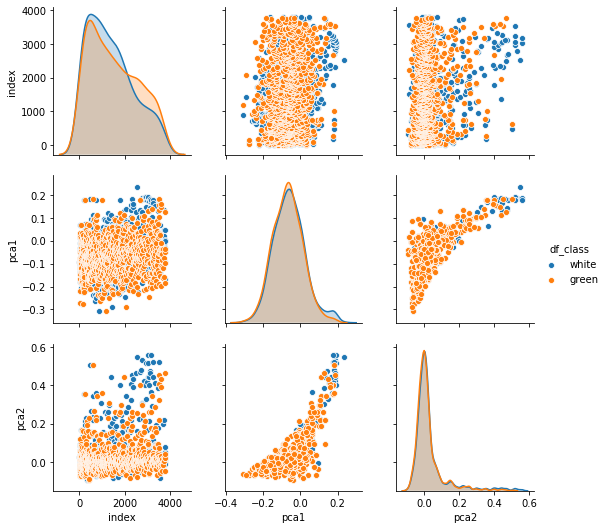

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(kind = 'scatter',data=mergeData,hue="df_class", diag_kind="kde",height=2.5)

In [15]:
textFrame = pd.DataFrame(features, columns = word)
textFrame

,00,000,0000,0005,01,010,0103,0105,0110,0127,...,龍門,龐克,龐克音樂,龐大,龐大市場,龐大資產,龐大軍餉,龔青,龜山,龜笑
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1877,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1878,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1879,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
allF = features.flatten()
nonZero = allF[np.nonzero(allF)]
m = np.median(nonZero)

In [17]:
allF[np.nonzero(allF)]

array([0.05516442, 0.09013344, 0.08264244, ..., 0.13475274, 0.13839339,
       0.14284919])

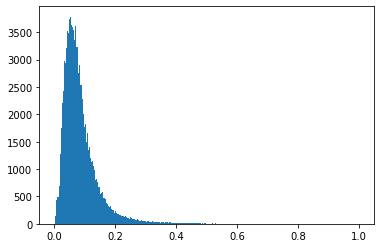

0.0717932086358178

In [18]:
plt.hist(nonZero, bins=500)
plt.show()
m

## kmeans

In [19]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
#from data_utils import *
import jieba
import matplotlib.pyplot as plt

In [20]:
tfidf_weight = tfidf.toarray()

kmeans = KMeans(n_clusters=7)
kmeans.fit(tfidf_weight)

# 印每群的中心點
#print(kmeans.cluster_centers_)
#for index, label in enumerate(kmeans.labels_, 1):
    #print("index: {}, label: {}".format(index, label))

# 可以把每筆data和距離中心的距離算出來，看看分類的狀況怎麼樣
#print("inertia: {}".format(kmeans.inertia_))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

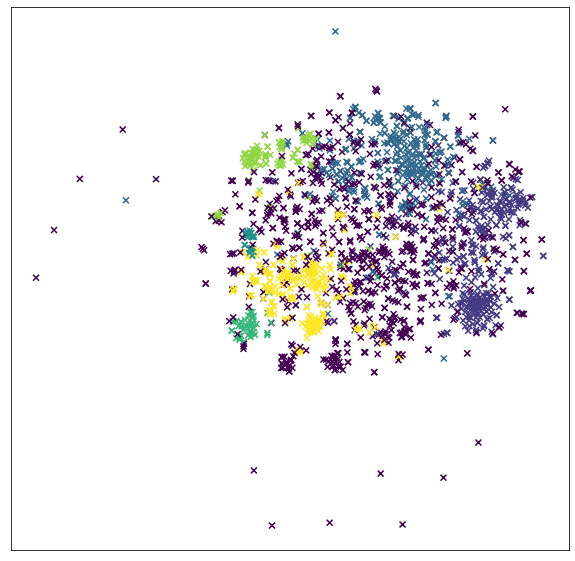

In [34]:
# 用T-SNE降維，比PCA準但比較久
tsne = TSNE(n_components=2)
decomposition_data = tsne.fit_transform(tfidf_weight)

x = []
y = []

for i in decomposition_data:
    x.append(i[0])
    y.append(i[1])

fig = plt.figure(figsize=(10, 10))
ax = plt.axes()
plt.scatter(x, y, c=kmeans.labels_, marker="x")
plt.xticks(())
plt.yticks(())
# plt.show()
plt.savefig('img/kmeans.png', aspect=1)

![title](img/kmeans.png)